In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.python.framework import ops
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import os
import csv

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Tue Mar 20 20:03:39 2018

@author: admin
"""
import tensorflow as tf
import numpy as np
from tensorflow.python.framework import ops
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import os
import csv

def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])  

if __name__ == '__main__':
    path = u'./data/DeepCID'
    #Load the mixture spectrum, its' labels and components information 
    #Load the mixture spectrum, its' labels and components information 
    datafile1 = path+'/mixture.npy'
    Xtest = np.load(datafile1) 

    datafile2 = path+'/label.npy'
    label = np.load(datafile2)   

    n = label.shape[0]
    
    csv_reader = csv.reader(open( path+'/namedata.csv', encoding='utf-8'))
    names = [row for row in csv_reader]    
    ypred = np.zeros((n*Xtest.shape[0],2))
    
  
    # Set the root directory of models and reload the models one by one 
    root = path+'/model'
    list_dirs = os.walk(root) 
    i=0
    for root, dirs, files in list_dirs: 
        for d in dirs: 
            tf.reset_default_graph()
            
            Y1 = label[i,:].reshape([Xtest.shape[0],1])
            Y2 = np.ones((Y1.shape)) - Y1
            Ytest = np.concatenate((Y1,Y2),axis=1)
       
            os.chdir(root +"/"+ d)
            #print(os.getcwd())
            datafile =u'./X_scale.npy'
            X_scale = np.load(datafile)
            Xtest_scale = (Xtest - X_scale[0])/X_scale[1]
             
            with tf.Session() as sess:
                new_saver=tf.train.import_meta_graph('./compoent.ckpt.meta')
                new_saver.restore(sess,"./compoent.ckpt")
                graph = tf.get_default_graph()
                xs=graph.get_operation_by_name('xs').outputs[0]
                #ys=graph.get_operation_by_name('ys').outputs[0]
                keep_prob=graph.get_operation_by_name('keep_prob').outputs[0]
     
                prediction = graph.get_tensor_by_name('prediction:0')
                test_ypred = sess.run(prediction,feed_dict={xs: Xtest_scale, keep_prob : 1.0})  
            ypred[i*Xtest.shape[0]:(i+1)*Xtest.shape[0],:] = test_ypred
            print('compoent', i, 'finished.','The test accuracy %.1f%%' % 
                  accuracy(ypred[i*Xtest.shape[0]:(i+1)*Xtest.shape[0],:],Ytest))   
            os.chdir("../../../..")
            i+=1
            
    
  
    # Print the components' name that are exited in the miatures
    for j in range(Xtest.shape[0]):
        print('The', j ,'th sample contains: ')
                
        # Yreal is design for calculate the accuracy.         
        y_real1 = label[:,j-Xtest.shape[0]].reshape([n,1])
        y_real2 = np.ones((y_real1.shape)) - y_real1
        y_real = np.concatenate((y_real1,y_real2),axis=1)   
                
        ypre = np.zeros((n,2))
        for k in range(n):            
            ypre[k,:] = ypred[j,:]
            j = j+Xtest.shape[0]
        
        for h in range(n):
            if (ypre[h,0]>=0.5):
                print(names[h])                   
        print('The prediction finished')


INFO:tensorflow:Restoring parameters from ./compoent.ckpt
compoent 0 finished. The test accuracy 100.0%
INFO:tensorflow:Restoring parameters from ./compoent.ckpt
compoent 1 finished. The test accuracy 100.0%
INFO:tensorflow:Restoring parameters from ./compoent.ckpt
compoent 2 finished. The test accuracy 100.0%
INFO:tensorflow:Restoring parameters from ./compoent.ckpt
compoent 3 finished. The test accuracy 100.0%
INFO:tensorflow:Restoring parameters from ./compoent.ckpt
compoent 4 finished. The test accuracy 100.0%
INFO:tensorflow:Restoring parameters from ./compoent.ckpt
compoent 5 finished. The test accuracy 100.0%
INFO:tensorflow:Restoring parameters from ./compoent.ckpt
compoent 6 finished. The test accuracy 100.0%
INFO:tensorflow:Restoring parameters from ./compoent.ckpt
compoent 7 finished. The test accuracy 100.0%
INFO:tensorflow:Restoring parameters from ./compoent.ckpt
compoent 8 finished. The test accuracy 100.0%
INFO:tensorflow:Restoring parameters from ./compoent.ckpt
compoe

compoent 78 finished. The test accuracy 100.0%
INFO:tensorflow:Restoring parameters from ./compoent.ckpt
compoent 79 finished. The test accuracy 100.0%
INFO:tensorflow:Restoring parameters from ./compoent.ckpt
compoent 80 finished. The test accuracy 100.0%
INFO:tensorflow:Restoring parameters from ./compoent.ckpt
compoent 81 finished. The test accuracy 100.0%
INFO:tensorflow:Restoring parameters from ./compoent.ckpt
compoent 82 finished. The test accuracy 100.0%
INFO:tensorflow:Restoring parameters from ./compoent.ckpt
compoent 83 finished. The test accuracy 100.0%
INFO:tensorflow:Restoring parameters from ./compoent.ckpt
compoent 84 finished. The test accuracy 100.0%
INFO:tensorflow:Restoring parameters from ./compoent.ckpt
compoent 85 finished. The test accuracy 100.0%
INFO:tensorflow:Restoring parameters from ./compoent.ckpt
compoent 86 finished. The test accuracy 100.0%
INFO:tensorflow:Restoring parameters from ./compoent.ckpt
compoent 87 finished. The test accuracy 100.0%
INFO:ten

compoent 156 finished. The test accuracy 100.0%
INFO:tensorflow:Restoring parameters from ./compoent.ckpt
compoent 157 finished. The test accuracy 100.0%
INFO:tensorflow:Restoring parameters from ./compoent.ckpt
compoent 158 finished. The test accuracy 100.0%
INFO:tensorflow:Restoring parameters from ./compoent.ckpt
compoent 159 finished. The test accuracy 100.0%
INFO:tensorflow:Restoring parameters from ./compoent.ckpt
compoent 160 finished. The test accuracy 100.0%
INFO:tensorflow:Restoring parameters from ./compoent.ckpt
compoent 161 finished. The test accuracy 100.0%
INFO:tensorflow:Restoring parameters from ./compoent.ckpt
compoent 162 finished. The test accuracy 100.0%
INFO:tensorflow:Restoring parameters from ./compoent.ckpt
compoent 163 finished. The test accuracy 100.0%
INFO:tensorflow:Restoring parameters from ./compoent.ckpt
compoent 164 finished. The test accuracy 100.0%
INFO:tensorflow:Restoring parameters from ./compoent.ckpt
compoent 165 finished. The test accuracy 100.0

In [4]:
test_mixtures = np.load(datafile1)
test_mixtures.shape

(6, 881)

In [16]:
datafile2 = path+'/label.npy'
label = np.load(datafile2)   
label.shape

(167, 6)

(1002, 2)

In [43]:
import matplotlib.pyplot as plt
def plot_raman_spectrum(intensities,func=None,plotname="default",**kwargs):
    fig=plt.figure()
    ax=fig.add_axes([0,0,1,1])
    ax.plot(intensities)  
        
    ax.set_xlabel('Wavenumber cm^-1')
    ax.set_ylabel('Intensities')
    ax.set_title(plotname.split("_")[0].upper()+" Spectrum")
    plt.savefig(plotname+".png",bbox_inches = 'tight')
    plt.show()
    

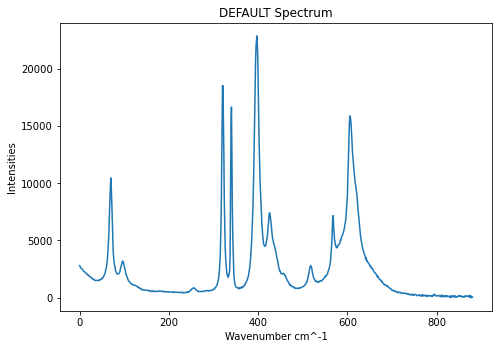

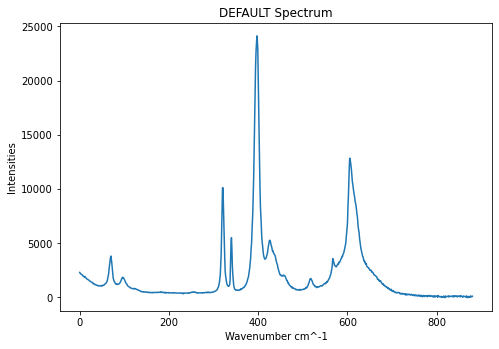

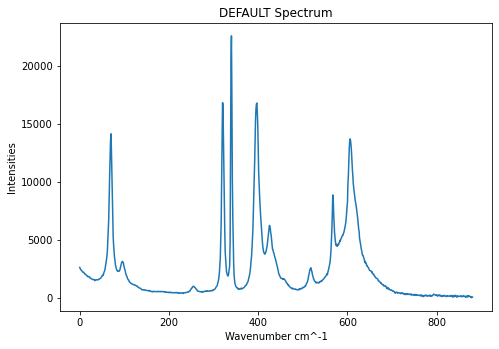

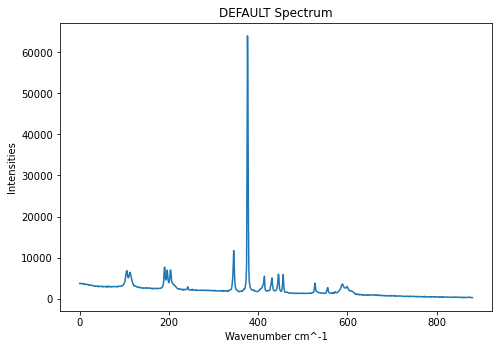

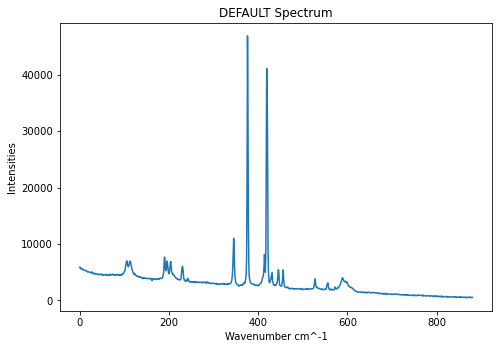

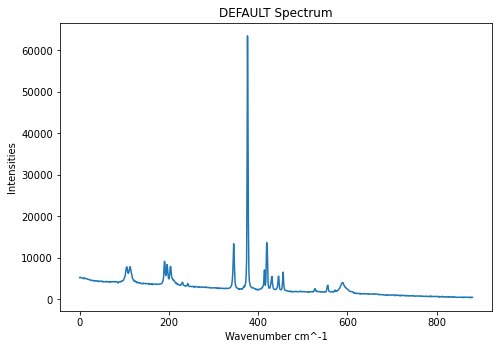

In [44]:
for i in range(test_mixtures.shape[0]):
    intensities = test_mixtures[i]
    plot_raman_spectrum(intensities)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

The epoch 0 finished. The accuracy 86.6% loss = 0.38509694
The epoch 1 finished. The accuracy 88.8% loss = 0.29481912
The epoch 2 finished. The accuracy 90.1% loss = 0.2703128
The epoch 3 finished. The accuracy 90.4% loss = 0.25839797
The epoch 4 finished. The accuracy 90.4% loss = 0.25685886
The epoch 5 finished. The accuracy 90.0% loss = 0.27177882
The epoch 6 finished. The accuracy 90.8% loss = 0.262108
The epoch 7 finished. The accuracy 90.9% loss = 0.2598533
The epoch 8 finished. The accuracy 91.1% loss = 0.26176625
The epoch 9 finished. The accuracy 91.2% loss = 0.2581292
Trained Model Saved.
INFO:tensorflow:Restoring parameters from ./model/compoent_0/compoent.ckpt
The test accu

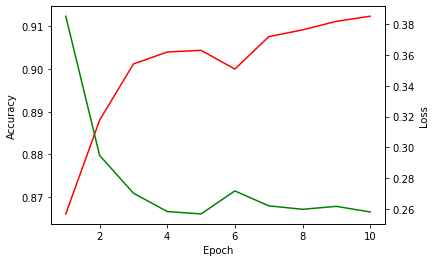

In [24]:
# -*- coding: utf-8 -*-
"""
Created on Mon Nov  6 19:29:07 2017

@author: admin
"""

import tensorflow as tf
import numpy as np
from tensorflow.python.framework import ops
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import os

tf.reset_default_graph()

def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])
  
def weights_variables(shape):
    weight = tf.Variable(tf.truncated_normal(shape,stddev=0.1))
    return weight
    
def bias_variables(shape):
    initial = tf.constant(0.1,shape=shape)
    return tf.Variable(initial)

def conv2d(x,W,s):
    return tf.nn.conv2d(x,W,strides=[1,1,2,1],padding='SAME') 
    
def max_pool_1x2(x):
    return tf.nn.max_pool(x,ksize=[1,1,2,1],strides=[1,1,2,1],padding='SAME')    
 

xs= tf.placeholder(tf.float32,[None,881],name='xs') 
ys= tf.placeholder(tf.float32,[None,2])
keep_prob = tf.placeholder(tf.float32,name='keep_prob')
x_image = tf.reshape(xs,[-1,1,881,1])

##conv1 layer##
W_conv1 = weights_variables([1,5,1,32])
b_conv1 = bias_variables([32])
h_conv1 = tf.nn.relu(conv2d(x_image,W_conv1,1) + b_conv1)
h_pool1 = max_pool_1x2(h_conv1)                        
h_W1_drop = tf.nn.dropout(h_pool1,keep_prob)

##conv2 layer##
W_conv2 = weights_variables([1,5,32,64])
b_conv2 = bias_variables([64])
h_conv2 = tf.nn.relu(conv2d(h_W1_drop,W_conv2,1) + b_conv2)
h_pool2 = max_pool_1x2(h_conv2)                       
h_W2_drop = tf.nn.dropout(h_pool2,keep_prob)

##func1 layer##
W_fc1 = weights_variables([1*56*64,1024])
b_fc1 = bias_variables([1024])
h_pool2_flat = tf.reshape(h_W2_drop,[-1,1*56*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat,W_fc1) + b_fc1)
h_fc1_drop = tf.nn.dropout(h_fc1,keep_prob)

##func2 layer##
W_fc2 = weights_variables([1024,2])
b_fc2 = bias_variables([2])

pred = tf.matmul(h_fc1_drop,W_fc2) + b_fc2
prediction = tf.nn.softmax(pred, name= 'prediction')

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred, labels = ys))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
saver = tf.train.Saver()


path = u'./data/DeepCID'
compound = 0

datafile1 = path+'/augmented_data/'+str(compound)+'component.npy'
X = np.load(datafile1)
Xtrain0 = X[0:15000]
Xvalid0 = X[15000:17500]
Xtest0 = X[17500:20000]
scaler = preprocessing.StandardScaler().fit(Xtrain0)
Xtrain = scaler.transform(Xtrain0)
Xvalid = scaler.transform(Xvalid0)
Xtest = scaler.transform(Xtest0)

datafile2 = path+'/augmented_data/'+str(compound)+'label.npy'
Y1 = np.load(datafile2) 
Y2 = np.ones((Y1.shape)) - Y1
Y = np.concatenate((Y1,Y2),axis=1)
Ytrain = Y[0:15000]
Yvalid = Y[15000:17500]
Ytest = Y[17500:20000]


accuracy_valid = []
loss_valid  = []
save_file = './model/compoent_'+str(compound)+'/compoent.ckpt'

batch_size = 100
epochs = 10
accuracy_valid.clear()
loss_valid.clear()


num_steps = Xtrain.shape[0] // batch_size
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for epoch in range(epochs):
        for step in range(num_steps):
            offset = (step * batch_size) % (Ytrain.shape[0] - batch_size)   
            batch_xs = Xtrain[offset:(offset + batch_size), :]
            batch_ys = Ytrain[offset:(offset + batch_size), :]
            feed_dict={xs:batch_xs,ys:batch_ys,keep_prob:0.5}
            _, loss, predictions = sess.run([train_step, cross_entropy, prediction], feed_dict=feed_dict)       
        
            feed_dict_val={xs:Xvalid,ys:Yvalid,keep_prob:1.0}       
            
            
        loss_val,pred_val = sess.run([cross_entropy,prediction], feed_dict=feed_dict_val)
        acc_val = accuracy(pred_val,Yvalid)
        print('The epoch', epoch, 'finished. The accuracy %.1f%%' % (acc_val),'loss =',loss_val)
        accuracy_valid.append(acc_val/100)
        loss_valid.append(loss_val)
    
    TIMES = [(i + 1) for i in range(0, epochs)]    
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.plot(TIMES,accuracy_valid,'r')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')    
    ax2 = ax1.twinx()  
    ax2.plot(TIMES, loss_valid, 'g')
    ax2.set_ylabel('Loss')

    saver.save(sess, save_file)
    print('Trained Model Saved.')


with tf.Session() as sess:
    saver.restore(sess, save_file)
    valid_ypred = sess.run(prediction,feed_dict={ xs: Xtest, ys: Ytest, keep_prob : 1.0})
print('The test accuracy %.1f%%' % accuracy(valid_ypred,Ytest))





In [61]:
## training data
path = u'./data/DeepCID'
compound = 0

compound0_spectra = path+'/augmented_data/'+str(compound)+'component.npy'
label0 = path+'/augmented_data/'+str(compound)+'label.npy'

data = np.load(compound0_spectra)
labels = np.load(label0)

In [62]:
## 20000 spectra collected over 881 bins
data.shape

(20000, 881)

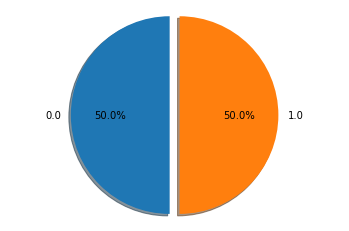

In [63]:
import matplotlib.pyplot as plt

unique_elements, counts_elements = np.unique(labels, return_counts=True)
lbls = unique_elements
sizes = counts_elements
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=lbls, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

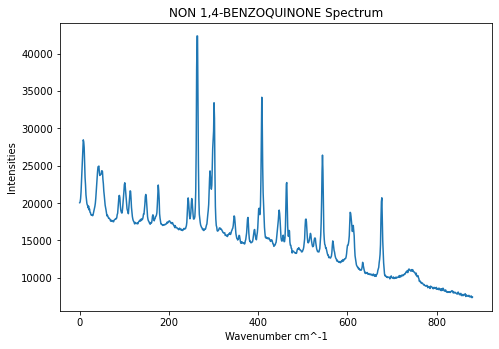

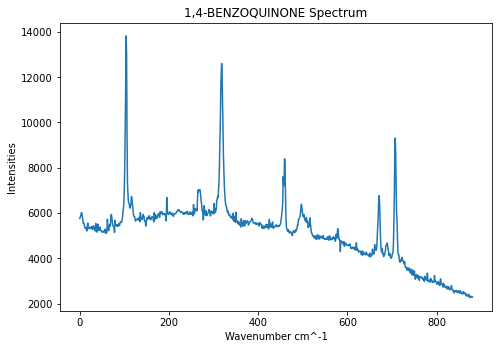

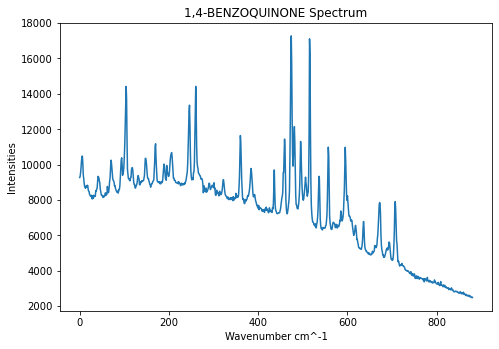

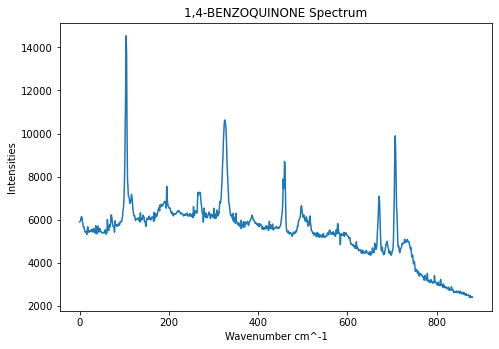

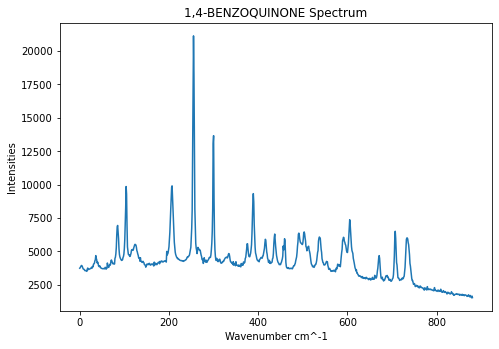

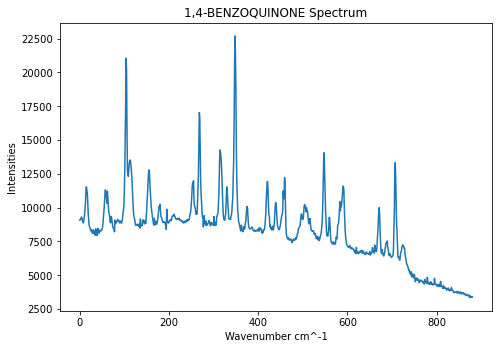

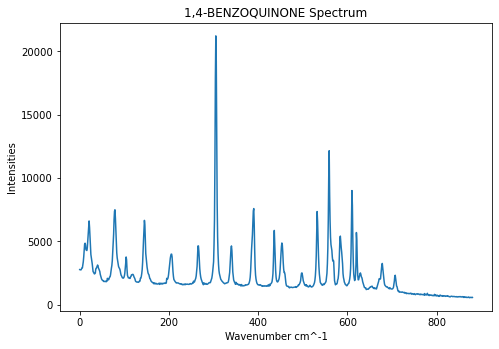

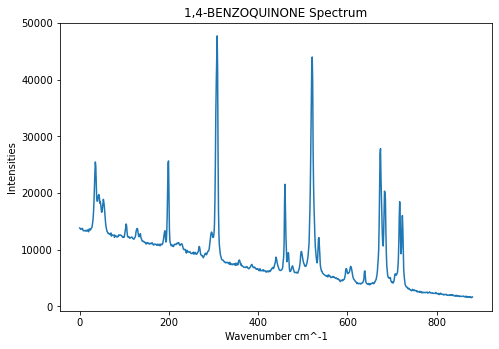

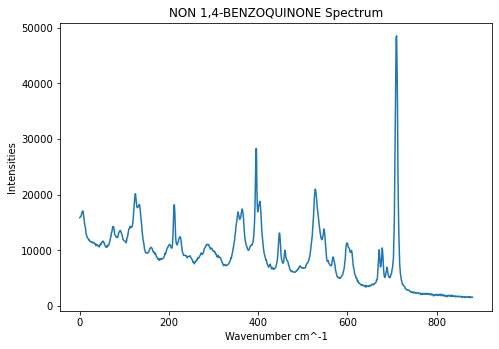

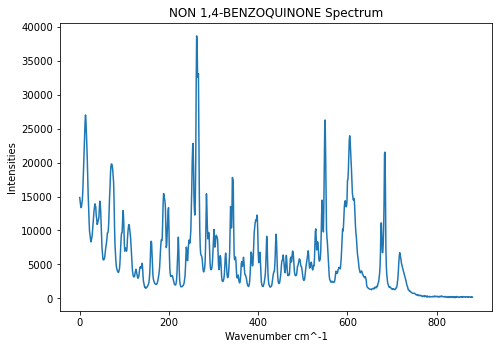

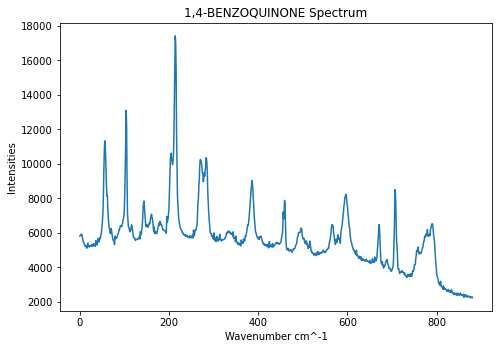

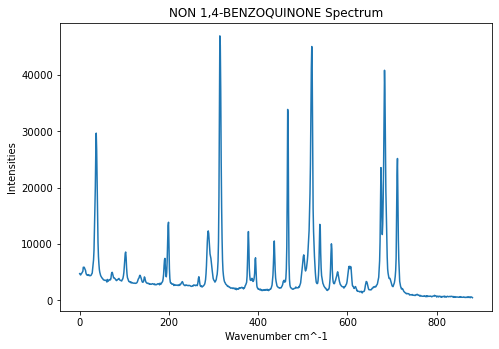

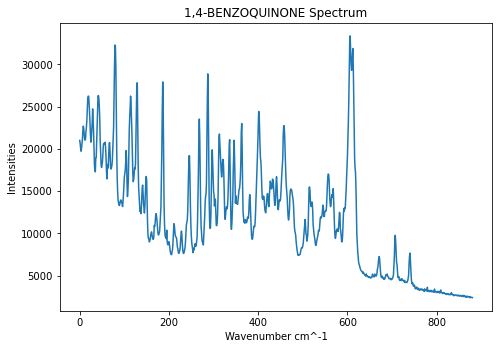

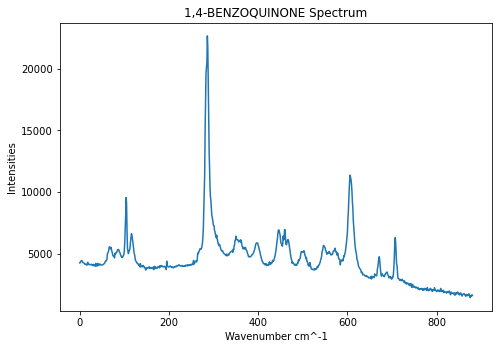

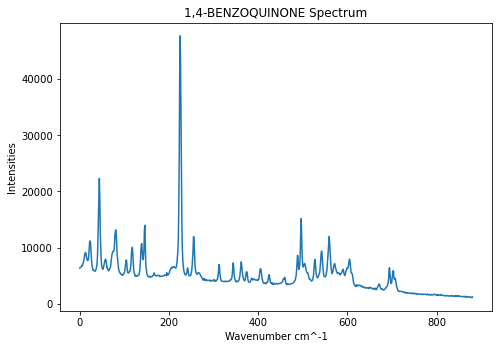

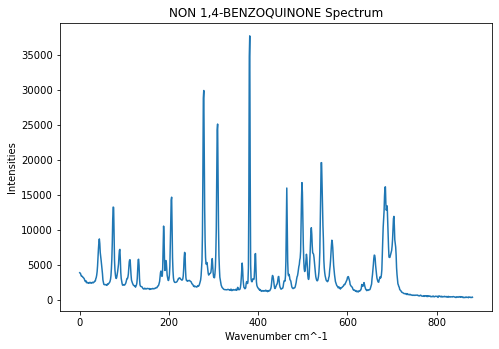

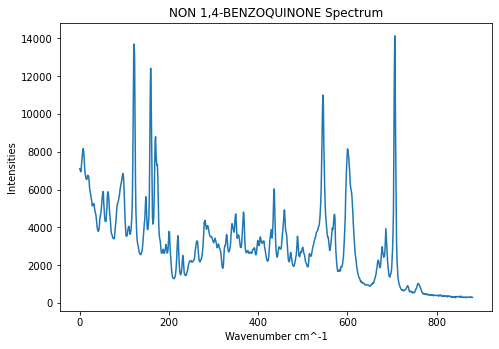

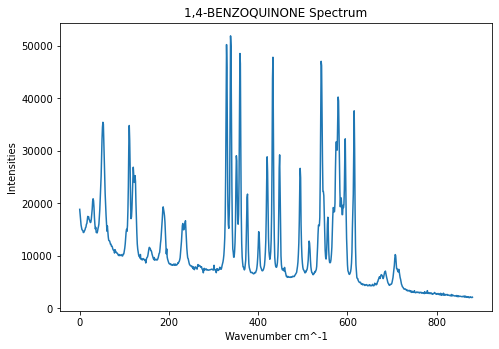

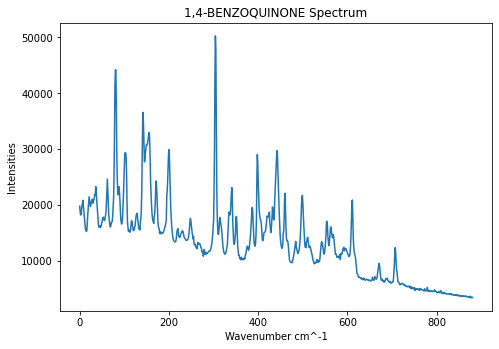

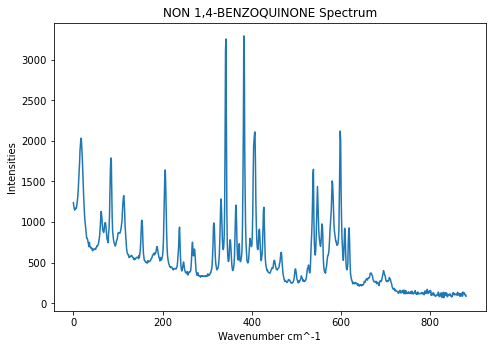

In [64]:
# plotting sample data used for training 1,4-Benzoquinone

for i in range(20):
    intensities = data[i]
    if labels[i] == 1:
        plotname = "1,4-Benzoquinone"
    else:
        plotname = "Non 1,4-Benzoquinone"
    plot_raman_spectrum(intensities,plotname = plotname )